In [4]:
pip install --upgrade seaborn pandas


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

# Load the dataset

data = pd.read_csv('Amazon_Sales_data.csv')

# Display the column names
print(data.columns)


Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


In [6]:
import pandas as pd

data = pd.read_csv('Amazon_Sales_data.csv')

# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract year and month from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Year_Month'] = data['Order Date'].dt.to_period('M')

# Display the transformed data
print(data.head())


                              Region                Country        Item Type  \
0              Australia and Oceania                 Tuvalu        Baby Food   
1  Central America and the Caribbean                Grenada           Cereal   
2                             Europe                 Russia  Office Supplies   
3                 Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                 Sub-Saharan Africa                 Rwanda  Office Supplies   

  Sales Channel Order Priority Order Date   Order ID  Ship Date  Units Sold  \
0       Offline              H 2010-05-28  669165933  6/27/2010        9925   
1        Online              C 2012-08-22  963881480  9/15/2012        2804   
2       Offline              L 2014-05-02  341417157   5/8/2014        1779   
3        Online              C 2014-06-20  514321792   7/5/2014        8102   
4       Offline              L 2013-02-01  115456712   2/6/2013        5062   

   Unit Price  Unit Cost  Total Revenue  Tot

In [7]:
# Step 1: Data Extraction
file_path = 'Amazon_Sales_data.csv'
data = pd.read_csv(file_path)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Amazon_Sales_data.csv')

# Step 2: Data Transformation
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract year, month, and year-month from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Year_Month'] = data['Order Date'].dt.to_period('M')

# Step 3: Clean the Data (Handle NaN and Infinite Values)
data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
data.dropna(subset=['Total Revenue'], inplace=True)







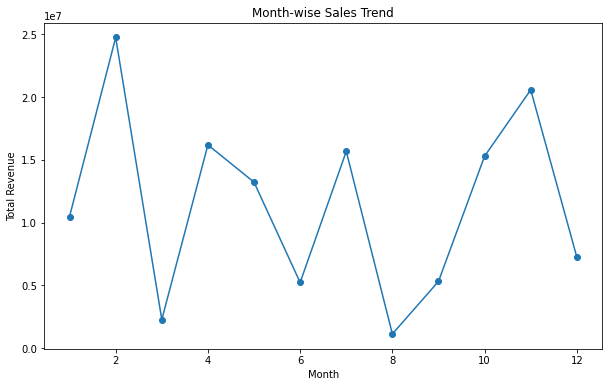

In [9]:
# Step 4: Sales Trend Analysis

# Month-wise sales trend
monthly_sales = data.groupby('Month')['Total Revenue'].sum()
plt.figure(figsize=(10,6))
plt.plot(monthly_sales.index.to_list(), monthly_sales.values.tolist(), marker="o")
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

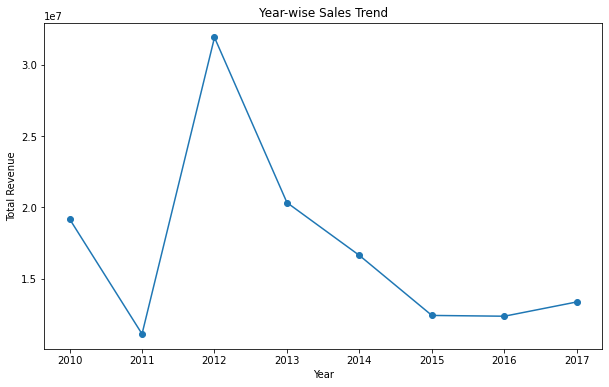

In [10]:

# Year-wise sales trend
yearly_sales = data.groupby('Year')['Total Revenue'].sum()
plt.figure(figsize=(10,6))
plt.plot(yearly_sales.index.to_list(), yearly_sales.values.tolist(), marker="o")
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()


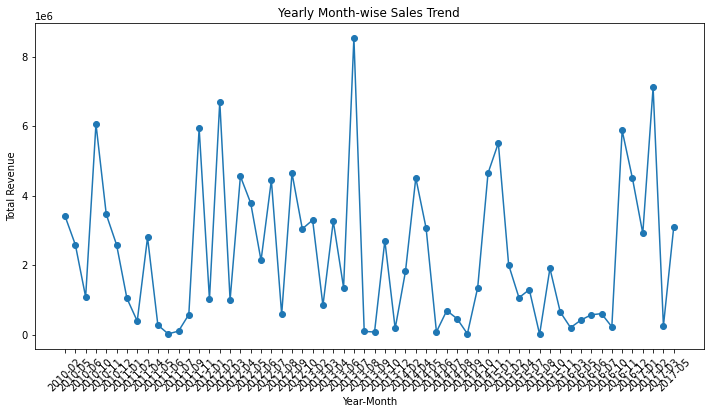

In [11]:
# Yearly Month-wise sales trend
yearly_monthly_sales = data.groupby('Year_Month')['Total Revenue'].sum()
plt.figure(figsize=(12,6))
plt.plot(yearly_monthly_sales.index.astype(str).to_list(), yearly_monthly_sales.values.tolist(), marker="o")
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Step 5: Key Metrics Calculation

# Total Sales
total_sales = data['Total Revenue'].sum()
print(f"Total Sales: {total_sales}")

# Average Order Value
average_order_value = data['Total Revenue'].mean()
print(f"Average Order Value: {average_order_value}")

# Sales Growth Rate (Year-over-Year)
yearly_sales_growth = yearly_sales.pct_change() * 100
print("Yearly Sales Growth Rate:")
print(yearly_sales_growth)

# Step 6: Explore Relationships Between Attributes

# Example: Correlation between Units Sold and Total Profit
correlation = data[['Units Sold', 'Total Profit']].corr()
print("Correlation between Units Sold and Total Profit:")
print(correlation)



Total Sales: 137348768.31
Average Order Value: 1373487.6831
Yearly Sales Growth Rate:
Year
2010           NaN
2011    -41.993372
2012    186.622055
2013    -36.265478
2014    -18.200455
2015    -25.268655
2016     -0.443480
2017      8.086666
Name: Total Revenue, dtype: float64
Correlation between Units Sold and Total Profit:
              Units Sold  Total Profit
Units Sold       1.00000       0.56455
Total Profit     0.56455       1.00000


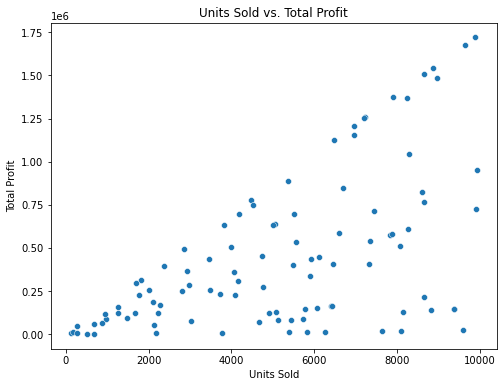

In [13]:
# Visualization of the relationship
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Units Sold'], y=data['Total Profit'])
plt.title('Units Sold vs. Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.show()


# Key metrics and factors and The meaningful relationships between attributes.

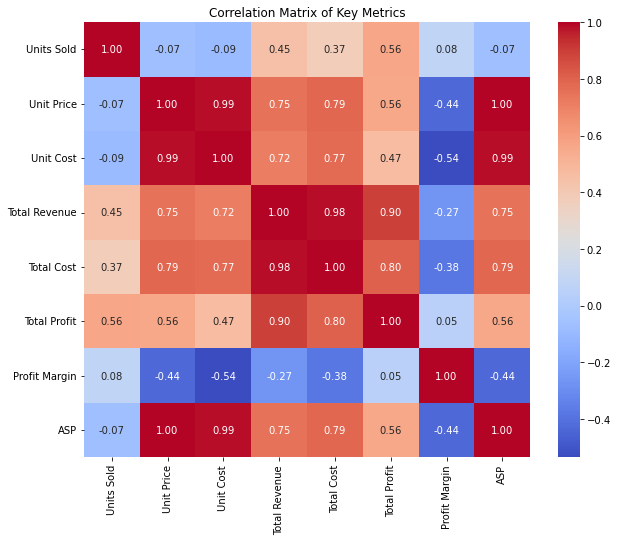

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')

# Calculate additional metrics
data['Profit Margin'] = (data['Total Profit'] / data['Total Revenue']) * 100
data['ASP'] = data['Total Revenue'] / data['Units Sold']

# 1. Correlation Matrix to find relationships between key metrics
corr_matrix = data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit', 'Profit Margin', 'ASP']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Metrics')
plt.show()


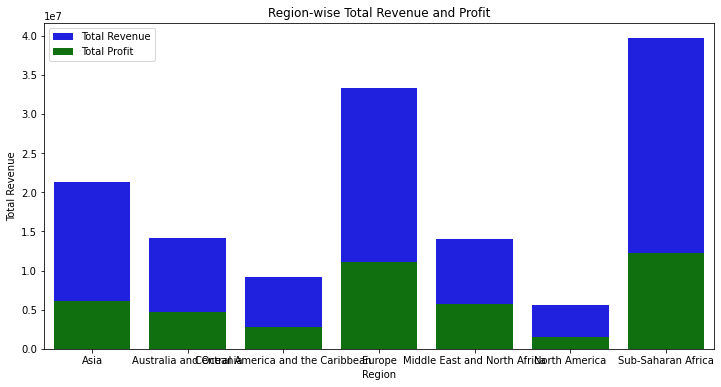

In [15]:
# 2. Region-wise Analysis
region_wise_sales = data.groupby('Region').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum',
    'ASP': 'mean',
    'Profit Margin': 'mean'
}).reset_index()

# Plotting Region-wise Total Revenue and Profit
plt.figure(figsize=(12, 6))
sns.barplot(data=region_wise_sales, x='Region', y='Total Revenue', color='blue', label='Total Revenue')
sns.barplot(data=region_wise_sales, x='Region', y='Total Profit', color='green', label='Total Profit')
plt.title('Region-wise Total Revenue and Profit')
plt.legend()
plt.show()

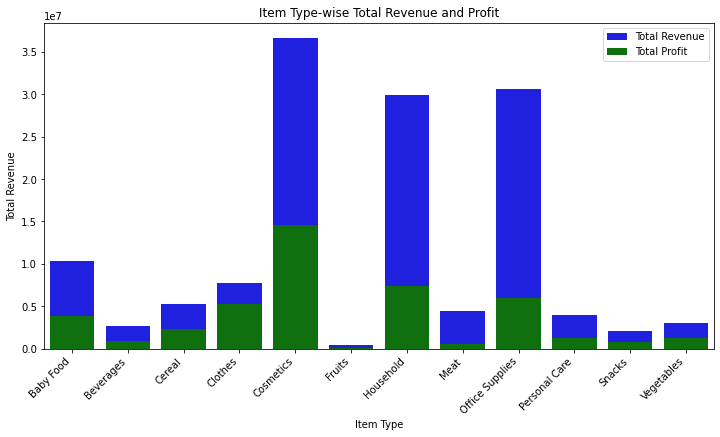

In [16]:
# 3. Item Type Analysis
item_type_sales = data.groupby('Item Type').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum',
    'ASP': 'mean',
    'Profit Margin': 'mean'
}).reset_index()

# Plotting Item Type-wise Total Revenue and Profit
plt.figure(figsize=(12, 6))
sns.barplot(data=item_type_sales, x='Item Type', y='Total Revenue', color='blue', label='Total Revenue')
sns.barplot(data=item_type_sales, x='Item Type', y='Total Profit', color='green', label='Total Profit')
plt.title('Item Type-wise Total Revenue and Profit')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

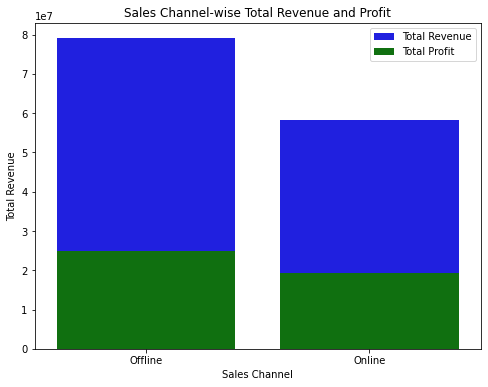

In [17]:
# 4. Sales Channel Analysis
sales_channel_sales = data.groupby('Sales Channel').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum',
    'Units Sold': 'sum',
    'ASP': 'mean',
    'Profit Margin': 'mean'
}).reset_index()

# Plotting Sales Channel-wise Total Revenue and Profit
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_channel_sales, x='Sales Channel', y='Total Revenue', color='blue', label='Total Revenue')
sns.barplot(data=sales_channel_sales, x='Sales Channel', y='Total Profit', color='green', label='Total Profit')
plt.title('Sales Channel-wise Total Revenue and Profit')
plt.legend()
plt.show()

In [18]:
# 5. Time-Series Analysis: Year-wise and Month-wise Trends
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

yearly_sales = data.groupby('Order Year').agg({
    'Total Revenue': 'sum',
    'Total Profit': 'sum'
}).reset_index()


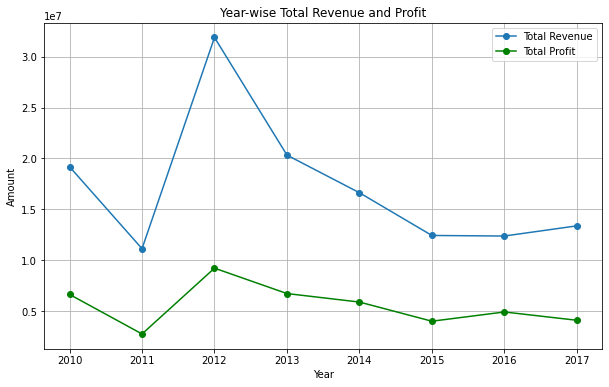

In [19]:
import matplotlib.pyplot as plt

# Convert to numpy arrays
years = yearly_sales['Order Year'].values
revenue = yearly_sales['Total Revenue'].values
profit = yearly_sales['Total Profit'].values

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))

# Plot for Total Revenue
plt.plot(years, revenue, marker='o', label='Total Revenue')

# Plot for Total Profit
plt.plot(years, profit, marker='o', label='Total Profit', color='green')

plt.title('Year-wise Total Revenue and Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.grid(True)
plt.legend()
plt.show()